# How can I render triangles and points together?

In [405]:
import numpy as np
import moderngl
from PIL import Image
from matplotlib import pyplot as plt
import re

In [288]:
ctx = moderngl.create_standalone_context()
ctx.enable(moderngl.DEPTH_TEST)
ctx.enable(moderngl.PROGRAM_POINT_SIZE)

In [403]:
with open('./vsh.glsl' , 'r') as f:
    vsh = f.read()

In [413]:
lines = re.split('\n|;', vsh)
print(lines)

['# version 330', '', 'in vec2 input_vertices', '', 'out vec2 vpos', '', '', '', 'void main(){', '  gl_Position = vec4(input_vertices, 0.0, 1.0)', '', '  vpos = input_vertices * 0.5 + 0.5', '', '}']


In [419]:
for line in lines:
    if re.split('\s',line)[0]=='in':
        print(line)

in vec2 input_vertices


In [388]:
purple_triangle_prog = ctx.program(
    vertex_shader="""

    # version 330
    
    in vec2 input_vertices;
    out vec2 vpos;
    
    
    void main(){
      gl_Position = vec4(input_vertices, 0.0, 1.0);
      vpos = input_vertices * 0.5 + 0.5;
    }
    
    """,
    geometry_shader=None,
    fragment_shader="""
    # version 330

    in vec2 vpos;
    uniform vec3 hoge;
    void main(){
      gl_FragColor = vec4(vpos.x, sin(vpos.y * 30.0)*0.5+0.5, vpos.y, 1.0) + vec4(hoge, 0.0);
    }

    """
)

In [455]:
white_dot_prog = ctx.program(
    vertex_shader="""

    # version 330
    
    in vec2 input_vertices;
    
    void main(){
      gl_Position = vec4(input_vertices, input_vertices.x, 1.0);
      gl_PointSize = 4.0;
    }
    
    """,
    fragment_shader="""
    # version 330
    uniform float hoge;
    void main(){
      float scaled_z = gl_FragCoord.z * 0.5 + 0.5;
      gl_FragColor = vec4(hoge, 1.0-hoge, scaled_z, 1.0);
    }

    """
)

In [456]:
v1 = np.asarray((
    (-0.6, 0.6),
    (0.6, 0.6),
    (0, -0.6)
))

In [457]:
v2 = np.random.rand(500, 2) * 2.0 - 1.0

In [458]:
vbo1 = ctx.buffer(v1.astype('f4').tobytes())
vao1 = ctx.simple_vertex_array(purple_triangle_prog, vbo1, 'input_vertices')

In [459]:
vbo2 = ctx.buffer(v2.astype('f4').tobytes())
vao2 = ctx.simple_vertex_array(white_dot_prog, vbo2, 'input_vertices')

In [460]:
fbo = ctx.simple_framebuffer((300, 300))
fbo.use()


In [506]:
(1,) * 2

(1, 1)

In [508]:
white_dot_prog['hoge'].value = np.ones(1)

In [509]:
fbo.clear(0.0, 0.0, 0.0, 1.0)
vao2.render(moderngl.POINTS)
vao1.render(moderngl.TRIANGLES)


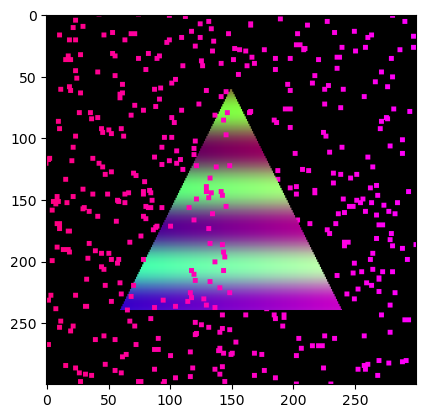

In [510]:
img = np.asarray(Image.frombytes('RGB', fbo.size, fbo.read()))

plt.imshow(img)
plt.show()

In [511]:
img.shape

(300, 300, 3)

In [438]:
key = 'vec242155'
temp = re.search('[0-9]+',key)
if temp is None:
    print('scalar input')
else:
    print('input width', int(temp.group()))

input width 242155


In [422]:
a = [1, 2, 3]
b = [1, 2, 4]
c = [234, 1234]

In [454]:
len((1,))

1

In [273]:
ctx.clear()

In [276]:
del ctx

In [279]:
class hoge:
    fuba = 1

    def x(self):
        print(self.fuba)
    

In [280]:
a = hoge()

In [281]:
a.x()

1


In [282]:
a.fuba = 'asdf'

In [283]:
a.x()

asdf


In [284]:
b = hoge()

In [285]:
b.x()

1


In [286]:
a.x()

asdf


In [373]:
class asdf:
    def __init__(self, namevaluepairlist):
        for namevaluepair in namevaluepairlist:
            setattr(self, *namevaluepair)

In [375]:
a = asdf((('x', 1),('y', 2),('z', 3)))

In [379]:
a.z += 1234

In [383]:
a.z

1237